In [132]:
import numpy as np
import matplotlib.pyplot as plt

The principle to hold a bump in a network is what is called "Mexican hat" connectivity

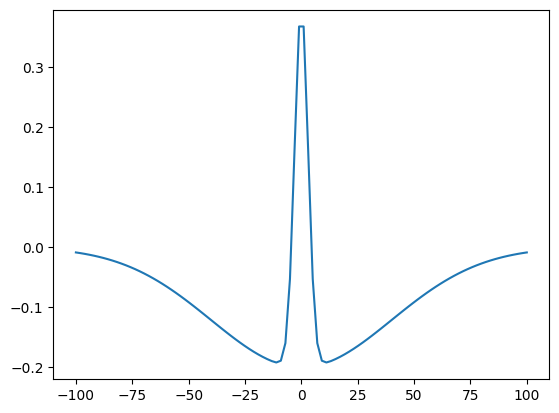

In [133]:
A1 = 0.6
A2 = 0.2
sigma1 = 3
sigma2 = 40
M = lambda k: A1*np.exp(-k**2/(2*sigma1**2)) - A2*np.exp(-k**2/(2*sigma2**2))

k = np.linspace(-100, 100, 100)
plt.plot(k, M(k))

Creating the weight matrix. The weight matrix will have short range excitation and long range inhibition

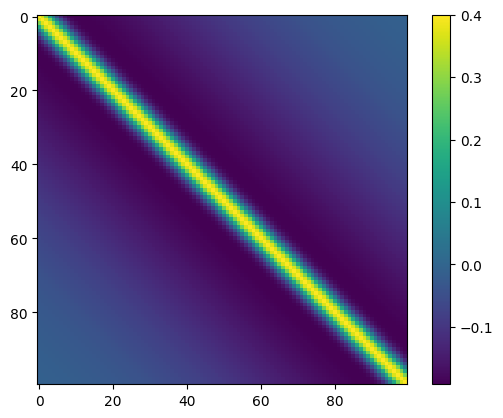

In [134]:
N = 100
W = np.zeros((N, N))

for i in range(N):
  for j in range(N):
    W[i, j] = M(i-j)


plt.imshow(W)
plt.colorbar()

Creating the neuronal model

Text(0, 0.5, 'Firing rate')

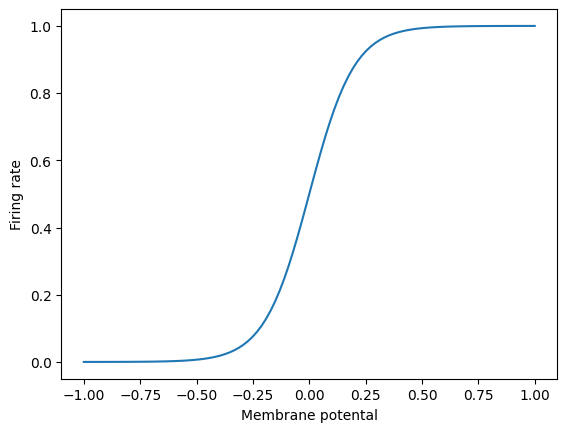

In [135]:
f = lambda u:1/(1 + np.exp(-10*u)) # This is the activation function

# if u is the membrane potential, f(u) is the firing rate

uu = np.linspace(-1, 1, 100)
plt.plot(uu, f(uu))
plt.xlabel('Membrane potental')
plt.ylabel('Firing rate')

If you put a bump in the network, it stays there:

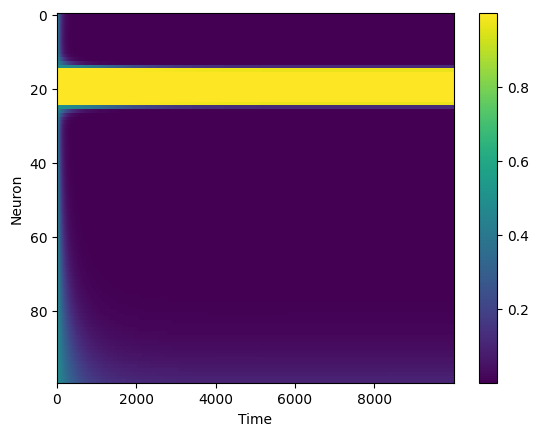

In [136]:

tau = 10.0
du = lambda u, I: -u/tau + W.dot(f(u - 0.7))/tau + I

h = 0.01
T = 10000
U = np.zeros((N, T)) # N neurons, T timepoints
I = np.zeros(N) # Input to the N neurons
idx = 20
U[idx-5: idx+5, 0] = 1 # Initial activity in neurons 10-30

for i in range(T-1):
  U[:,i + 1] = U[:,i] + h*du(U[:,i], I)


plt.imshow(f(U),  interpolation='nearest', aspect='auto') # Color is the firing rate of the neurons
plt.xlabel('Time')
plt.ylabel('Neuron')
plt.colorbar()

If you make the mexican hat asymmetric, you can move the bump around:

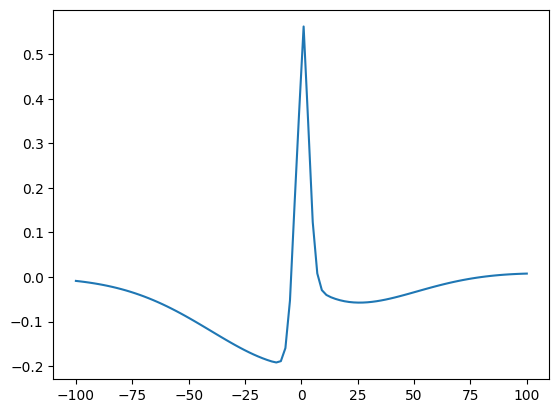

In [137]:
A1 = 0.6
A2 = 0.2
sigma1 = 3
sigma2 = 40
M = lambda k: A1*np.exp(-k**2/(2*sigma1**2)) - A2*np.exp(-k**2/(2*sigma2**2)) + np.heaviside(k, 0)*0.2*np.exp(-np.abs(k)/sigma2)

k = np.linspace(-100, 100, 100)
plt.plot(k, M(k))

Recreating the weight matrix

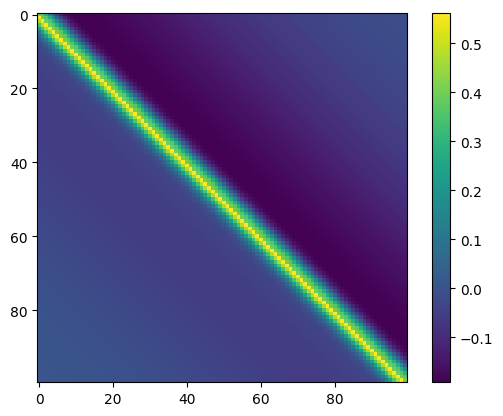

In [138]:
N = 100
W = np.zeros((N, N))

for i in range(N):
  for j in range(N):
    W[i, j] = M(i-j)


plt.imshow(W)
plt.colorbar()

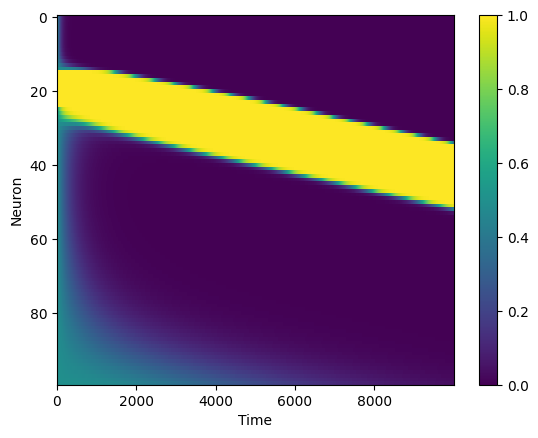

In [139]:
tau = 10.0
du = lambda u, I: -u/tau + W.dot(f(u - 0.7))/tau + I

h = 0.01
T = 10000
U = np.zeros((N, T)) # N neurons, T timepoints
I = np.zeros(N) # Input to the N neurons
idx = 20
U[idx-5: idx+5, 0] = 1 # Initial activity in neurons 10-30

for i in range(T-1):
  U[:,i + 1] = U[:,i] + h*du(U[:,i], I)


plt.imshow(f(U),  interpolation='nearest', aspect='auto') # The color is the firing rate
plt.xlabel('Time')
plt.ylabel('Neuron')
plt.colorbar()